# Setup

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras


# Get the Data

In [13]:
# Convert dataset to dataframe
train_set = pd.read_csv("tabular-playground-series-aug-2021\\train.csv")
test_set = pd.read_csv("tabular-playground-series-aug-2021\\test.csv")

# Explore the Data

In [14]:
train_set.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
0,0,-0.002350,59,0.766739,-1.350460,42.2727,16.68570,30.3599,1.267300,0.392007,...,-42.43990,26.854000,1.45751,0.696161,0.941764,1.828470,0.924090,2.29658,10.48980,15
1,1,0.784462,145,-0.463845,-0.530421,27324.9000,3.47545,160.4980,0.828007,3.735860,...,-184.13200,7.901370,1.70644,-0.494699,-2.058300,0.819184,0.439152,2.36470,1.14383,3
2,2,0.317816,19,-0.432571,-0.382644,1383.2600,19.71290,31.1026,-0.515354,34.430800,...,7.43721,37.218100,3.25339,0.337934,0.615037,2.216760,0.745268,1.69679,12.30550,6
3,3,0.210753,17,-0.616454,0.946362,-119.2530,4.08235,185.2570,1.383310,-47.521400,...,9.66778,0.626942,1.49425,0.517513,-10.222100,2.627310,0.617270,1.45645,10.02880,2
4,4,0.439671,20,0.968126,-0.092546,74.3020,12.30650,72.1860,-0.233964,24.399100,...,290.65700,15.604300,1.73557,-0.476668,1.390190,2.195740,0.826987,1.78485,7.07197,1


In [15]:
train_set.describe()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,124999.500000,0.511213,51.378476,0.107155,0.050010,3595.133426,8.205953,164.508753,0.375533,16.669745,...,4856.812768,22.579100,2.030554,0.079692,1.555097,2.417556,0.537484,1.576900,8.048805,6.813920
std,72168.927986,0.307884,42.396636,1.322200,0.792368,6072.401061,5.475723,183.335563,0.813597,99.758709,...,8501.609009,14.849390,0.900211,0.587780,9.253785,0.892563,0.226589,0.646306,5.647368,7.940179
min,0.000000,-0.069273,-17.000000,-7.895580,-1.475560,-7589.280000,-3.291050,-40.967200,-4.143080,-502.813000,...,-12695.700000,-4.059170,0.057800,-1.998800,-24.686300,-1.131980,0.005249,-0.646967,-0.842397,0.000000
25%,62499.750000,0.251287,18.000000,-0.611172,-0.719418,163.864750,4.110127,27.894900,-0.026245,-17.392025,...,73.203100,11.525450,1.471650,-0.408975,-4.004925,1.906718,0.359646,1.215810,3.732800,1.000000
50%,124999.500000,0.514962,41.000000,0.253815,0.004099,943.000500,7.472445,91.005250,0.619862,8.714945,...,1060.025000,19.993200,1.660830,0.215710,0.759942,2.340430,0.531348,1.451285,7.182205,4.000000
75%,187499.250000,0.777323,75.000000,0.759249,0.765456,4115.355000,11.030950,240.843750,0.933855,55.407625,...,5572.982500,32.271625,2.320085,0.503134,6.202502,2.910020,0.709807,1.901632,10.998550,10.000000
max,249999.000000,1.072070,273.000000,9.768590,1.680190,37847.500000,35.078000,947.143000,4.010380,465.956000,...,54334.600000,79.912400,5.403020,1.944190,42.890400,5.576040,1.105400,4.492620,34.019200,42.000000


In [16]:
# Function that returns a dataframe to preview the missing values and the percentage
# of missing values in each column
def missing_values_table(data):
    mis_val = data.isnull().sum()
    mis_val_percent = 100 * data.isnull().sum() / len(data)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [17]:
missing_values_table(train_set)

Your selected dataframe has 102 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


<AxesSubplot:>

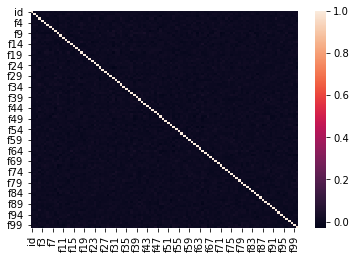

In [18]:
# Correlation Matrix
correlation_matrix = train_set.corr()
sns.heatmap(correlation_matrix)

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>,
        <AxesSubplot:title={'center':'f2'}>,
        <AxesSubplot:title={'center':'f3'}>,
        <AxesSubplot:title={'center':'f4'}>,
        <AxesSubplot:title={'center':'f5'}>,
        <AxesSubplot:title={'center':'f6'}>,
        <AxesSubplot:title={'center':'f7'}>,
        <AxesSubplot:title={'center':'f8'}>],
       [<AxesSubplot:title={'center':'f9'}>,
        <AxesSubplot:title={'center':'f10'}>,
        <AxesSubplot:title={'center':'f11'}>,
        <AxesSubplot:title={'center':'f12'}>,
        <AxesSubplot:title={'center':'f13'}>,
        <AxesSubplot:title={'center':'f14'}>,
        <AxesSubplot:title={'center':'f15'}>,
        <AxesSubplot:title={'center':'f16'}>,
        <AxesSubplot:title={'center':'f17'}>,
        <AxesSubplot:title={'center':'f18'}>],
       [<AxesSubplot:title={'center':'f19'}>,
        <AxesSubplot:title={'center':'f20'}

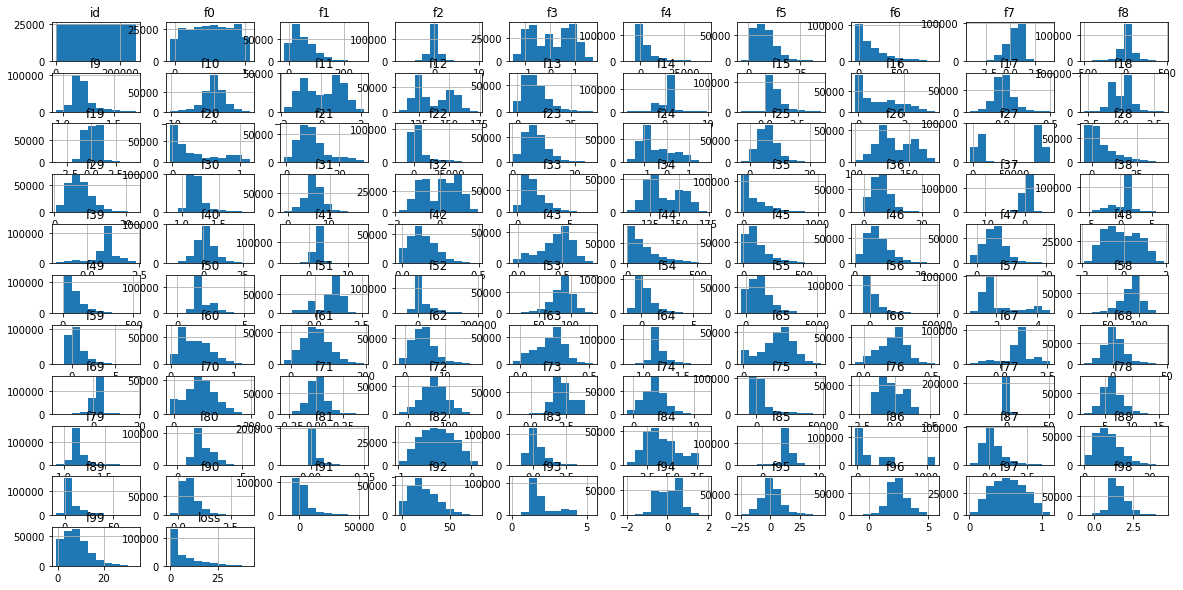

In [19]:
# Histogram of attributes
train_set.hist(figsize=(20,10))

# Prepare Data

In [20]:
del train_set["id"]
del test_set["id"]
y_train = train_set["loss"]
X_train, X_test = train_set.loc[:, train_set.columns != "loss"], test_set

# Train Model

In [21]:
def normalize(X_train, y_train, X_test):
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train, y_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

In [24]:
X_train_scaled, X_test_scaled = normalize(X_train, y_train, X_test)
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=X_train_scaled.shape[1]),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1)
])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model.compile(loss="mse", optimizer="nadam", metrics=[tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, callbacks=[early_stopping_cb])

Epoch 1/50
6250/6250 [==============================] - 78s 12ms/step - loss: 65.3909 - root_mean_squared_error: 8.0865 - val_loss: 63.1891 - val_root_mean_squared_error: 7.9492
Epoch 2/50
6250/6250 [==============================] - 77s 12ms/step - loss: 63.0277 - root_mean_squared_error: 7.9390 - val_loss: 63.0157 - val_root_mean_squared_error: 7.9382
Epoch 3/50
6250/6250 [==============================] - 77s 12ms/step - loss: 62.8841 - root_mean_squared_error: 7.9300 - val_loss: 62.9333 - val_root_mean_squared_error: 7.9330
Epoch 4/50
6250/6250 [==============================] - 77s 12ms/step - loss: 62.8561 - root_mean_squared_error: 7.9282 - val_loss: 63.0636 - val_root_mean_squared_error: 7.9413
Epoch 5/50
6250/6250 [==============================] - 77s 12ms/step - loss: 62.8254 - root_mean_squared_error: 7.9262 - val_loss: 62.9583 - val_root_mean_squared_error: 7.9346
Epoch 6/50
6250/6250 [==============================] - 77s 12ms/step - loss: 62.7918 - root_mean_squared_erro

# Learning Curves

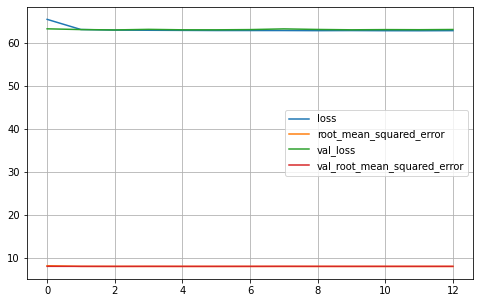

In [27]:
import json
history_dict = history.history
json.dump(history_dict, open("history.json", 'w'))


pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)

In [29]:
model.save("keras_model.h5", save_format="h5")

In [30]:
model.evaluate(X_train_scaled, y_train)

7813/7813 [==============================] - 14s 2ms/step - loss: 62.6160 - root_mean_squared_error: 7.9130


[62.61595916748047, 7.913024425506592]

# Predictions

In [33]:
predictions = model.predict(X_test_scaled)

In [35]:
submission = pd.read_csv('tabular-playground-series-aug-2021/sample_submission.csv')
submission["loss"]= predictions
submission.to_csv("submission.csv", index=False)